# Kelompok Timothy Ray
* 1119003 - Levin Martinus Budiarto
* 1119005 – Aristo Demos
* 1119006 – William Juniar
* 1119007 - Timothy Ray
* 1119009 - Julian
* 1119011 – Andreas Virdian

### Library

In [1]:
import pandas as pd
import numpy as np
import nltk, re, string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()
import matplotlib.pyplot as plt

### Dataset

In [2]:
df = pd.read_csv('jokowi_twitter_sentiment.csv')
df

,Unnamed: 0,id,text,created_at
0,0.0,1495415872164229120,RT @LurahIstana: Jokowi sudah mengesahkan pera...,2022-02-20T15:11:42.000Z
1,1.0,1495415869673177090,RT @NabilaAr__: Kami para santri sangat tepat ...,2022-02-20T15:11:41.000Z
2,2.0,1495415863377539074,RT @Sangkuriang5551: FOKUS KE JOKOWI!\n\nMasal...,2022-02-20T15:11:39.000Z
3,3.0,1495415855546798083,RT @jokowi: Srikandi-srikandi bulutangkis putr...,2022-02-20T15:11:38.000Z
4,4.0,1495415849015930880,RT @CasanovaX8X: LOMBOK #MandalikaCircuit\n#Jo...,2022-02-20T15:11:36.000Z
...,...,...,...,...
275,95.0,1496442136132452360,"RT @CNNIndonesia: ""Kalau publik enggak ribut, ...",2022-02-23T11:09:42.000Z
276,96.0,1496442134698020865,RT @djaritakirana: Terus kawal kasus duo terdu...,2022-02-23T11:09:42.000Z
277,97.0,1496442132844134404,"RT @OposisiCerdas: Soroti Kinerja Jokowi, Riza...",2022-02-23T11:09:41.000Z
278,98.0,1496442127999733766,RT @dennysirregar7: Mau muntah gua... \n\nhttp...,2022-02-23T11:09:40.000Z


Dataset tersebut diambil dari twitter tweet extraction menggunakan API yang sebelumnya sudah dijalankan dan dimasukkan ke file csv.

In [3]:
tweets = df[df['text'].duplicated()==False]
tweets

,Unnamed: 0,id,text,created_at
0,0.0,1495415872164229120,RT @LurahIstana: Jokowi sudah mengesahkan pera...,2022-02-20T15:11:42.000Z
1,1.0,1495415869673177090,RT @NabilaAr__: Kami para santri sangat tepat ...,2022-02-20T15:11:41.000Z
2,2.0,1495415863377539074,RT @Sangkuriang5551: FOKUS KE JOKOWI!\n\nMasal...,2022-02-20T15:11:39.000Z
3,3.0,1495415855546798083,RT @jokowi: Srikandi-srikandi bulutangkis putr...,2022-02-20T15:11:38.000Z
4,4.0,1495415849015930880,RT @CasanovaX8X: LOMBOK #MandalikaCircuit\n#Jo...,2022-02-20T15:11:36.000Z
...,...,...,...,...
272,91.0,1496442156030230528,RT @Darmara02177184: @januar_malki @KangUtang0...,2022-02-23T11:09:47.000Z
273,92.0,1496442152108556292,Otok nya hanya duit. duit dr rakyat biar pun r...,2022-02-23T11:09:46.000Z
274,94.0,1496442144613335045,@Giring_Ganesha @jokowi Jilat trs... Biar jd m...,2022-02-23T11:09:44.000Z
275,95.0,1496442136132452360,"RT @CNNIndonesia: ""Kalau publik enggak ribut, ...",2022-02-23T11:09:42.000Z


Kemudian, data duplikat dibuang sehingga total sekarang ada 208 data.

In [4]:
tweets = tweets['text'].to_numpy(dtype='str')
tweets

array(['RT @LurahIstana: Jokowi sudah mengesahkan peraturan wajib BPJS yg akan diterapkan dalam segala aspek baik pengurusan surat surat dan perjua…',
       'RT @NabilaAr__: Kami para santri sangat tepat dlm memilih Bpk Erick Thohir sbg penerus Presiden Jokowi. Indonesia sangat membutuhkan pemimp…',
       'RT @Sangkuriang5551: FOKUS KE JOKOWI!\n\nMasalah bukan di Mentan, Mendikbud, Menag, Menhan, Menaker, Mendag . . Masalah ada pada Jokowi.\n\nHAN…',
       'RT @jokowi: Srikandi-srikandi bulutangkis putri Indonesia mencetak sejarah dengan meraih gelar juara pada Kejuaraan Bulutangkis Asia Beregu…',
       'RT @CasanovaX8X: LOMBOK #MandalikaCircuit\n#JokowiBangunNusantara\n@jokowi 🇮🇩\n@Lemp3r\n@AbidinBoryta \n@tnmuda\n@nikilo2512\n@caesar_emil\n@RstmBc…',
       'RT @geloraco: BPJS Kesehatan Jadi Syarat Jual Beli Tanah, PKB Curiga Ada Penyusup Jahat Sekitar Jokowi\nhttps://t.co/uxY1Xqbs5g',
       'RT @KangUtang04: #JokowiTheRealDictator \n#JokowiTheRealDictator \n@MatahariTimur17\n@D

### Slang

In [5]:
slang = pd.read_csv('slang.csv')
slang_list = slang.to_numpy(dtype='str')
slang_list

array([['anakjakartaasikasik', 'anak jakarta asyik asyik'],
       ['pakcikdahtua', 'pak cik sudah tua'],
       ['pakcikmudalagi', 'pak cik muda lagi'],
       ...,
       ['menaker', 'menteri tenaga kerja'],
       ['memetwit', 'mentwit'],
       ['megangin', 'memegang']], dtype='<U124')

Dibaca sebuah file slang.csv yang berisi tentang slang words yang terdapat dalam dataset.

In [6]:
def unslang_word(word):
    if word not in slang_list[:,0]:
        return [word]
    
    index = slang_list[:,0].tolist().index(word)
    new_word = slang_list[index,1]
    
    return [w for w in new_word.split()]

Fungsi unslang word bertujuan untuk menemukan kata yang terdapat dalam daftar slang di atas, kemudian mengubahnya menjadi kata yang tepat.

### Preprocessing

In [7]:
word_dict = []

stopwords = set(nltk.corpus.stopwords.words('indonesian'))

for tweet in tweets:
    # sentence segmentation
    sent_tokens = []
    sentences = nltk.tokenize.sent_tokenize(tweet)
    
    for sentence in sentences:
        # case folding: to lower, remove punctuation, remove whitespace, symbol to word, remove non ASCII
        remove = string.punctuation.replace('@','')+'"'+'0123456789'
        folded = sentence.replace('&amp','').replace('&', 'dan').replace('\n','').replace('RT','').encode('ascii','ignore').decode('ascii').translate(str.maketrans('','',remove)).strip().lower()
        folded = folded.replace('mentan', 'menteri pertahanan').replace('menakertrans', 'menteri ketenagakerjaan dan transportasi').replace('menperin', 'menteri perindustrian')
        sent_tokens.append(folded)
        
        # word tokenizing
        words = nltk.word_tokenize(folded)

        isUser = False
        # count word frequency
        for word in words:
            # user check
            if isUser:
                isUser = !isUser
                continue
            if word == '@':
                isUser = !isUser
                continue
            
            # manual check
            if word == 'han':
                continue
            if word.startswith('htt'):
                continue
            if word == 'b':
                continue
            if word == 'nya':
                continue
            if word == 'khususon':
                continue
            if word == 'pakcc':
                continue
            if word == 'jk':
                continue
            if word == 'rendahklik':
                continue
            if word == 't':
                continue
            if word == 'l':
                continue
            if word == 'nge':
                continue
            if word == 'ce':
                continue
            if word == 'dunkngangkt':
                continue
            
            if word == 'pemimp':
                word = 'pemimpin'
            elif word == 'teriakteriak':
                word = 'teriak'
            elif word == 'stand':
                word = 'standar'
            elif word.startswith('wkwk'):
                word = 'haha'
            elif word == 'jht':
                word = 'jahat'
            elif word == 'humorpublikwadastolaktambang':
                word = 'tolak'
            elif word == 'mandalikacircuitjokowibangunnusantara':
                word = 'membangun'
            elif word == 'text':
                word = 'teks'
            elif word == 'kasiahn':
                word = 'kasihan'
            elif word == 'wewariakab':
                word_dict.append('wewaria')
                word = 'kabupaten'
            elif word == 'orangorang':
                word = 'orang'
            elif word == 'bersamajokowi':
                word_dict.append('bersama')
                word = 'jokowi'
            elif word == 'indonesiamaju':
                word_dict.append('indonesia')
                word = 'maju'
            elif word == 'migor':
                word_dict.append('minyak')
                word = 'goreng'
            elif word == 'antre':
                word = 'mengantri'
            elif word == 'seoenuhnya':
                word = 'sepenuhnya'
            elif word == 'danmulai':
                word = 'mulai'
            elif word == 'copasjokowi':
                word = 'contoh'
                word_dict.append('jokowi')
            elif word == 'swkian':
                word = 'sekian'
            elif word == 'barumendingan':
                word_dict.append('baru')
                word = 'mendingan'
            elif word == 'merupakn':
                word = 'merupakan'
            elif word == 'internasionaljokowi':
                word_dict.append('internasional')
                word = 'jokowi'
            elif word == 'pimpinanpimpinan':
                word = 'pimpinan'
            elif word == 'bgituini':
                word = 'begitu'
            elif word == 'hero':
                word = 'pahlawan'
            
            
#             check with slang.csv
            for new_word in unslang_word(word):
                # stopword removal
                if new_word in stopwords:
                    continue

                word_dict.append(new_word)

word_dict

['indonesia',
 'membutuhkan',
 'pemimpin',
 'menteri',
 'pertahanan',
 'menteri',
 'pendidikan',
 'kebudayaan',
 'menteri',
 'agama',
 'menhan',
 'menteri',
 'tenaga',
 'kerja',
 'menteri',
 'perdagangan',
 'jokowi',
 'tunggu',
 'orang',
 'komplain',
 'viral',
 'diblokir',
 'wewenang',
 'memblokirnya',
 'judul',
 'humornya',
 'puas',
 'puas',
 'tolak',
 'dungunya',
 'teriak',
 'nikmati',
 'pilihanmu',
 'terima',
 'kasih',
 'pintaku',
 'tolong',
 'bangun',
 'stadion',
 'olahraga',
 'standar',
 'ironis',
 'rakyat',
 'antre',
 'beli',
 'minyak',
 'goreng',
 'indonesia',
 'pas',
 'varian',
 'omicron',
 'langka',
 'survei',
 'median',
 'basis',
 'pemilih',
 'jokowi',
 'berpendidikan',
 'baca',
 'pemeriksaan',
 'akhirat',
 'kelak',
 'lombok',
 'membangun',
 'merdeka',
 'virus',
 'hilang',
 'bulusukan',
 'jokowi',
 'warga',
 'kampung',
 'terbiasa',
 'bermasker',
 'oi',
 'diam',
 'pecat',
 'menteri',
 'ketenagakerjaan',
 'transportasi',
 'menteri',
 'perindustrian',
 'menteri',
 'tenaga',
 'ke

Dalam kode di atas, banyak hal yang terjadi. Pertama, ditentukan stopwords untuk bahasa Indonesia dengan menggunakan nltk.corpus. Lalu, proses preprocessing dimulai dengan membaca tiap tweet. Pertama, tweet disegmentasikan menjadi beberapa kalimat. Setelah itu, kalimat dilakukan looping lagi untuk diproses lebih lanjut. Dilakukan case folding yang membuang punctuation, mengubah semua huruf menjadi huruf kecil, mmenghilangkan whitespace, mengubah beberapa simbol baca menjadi kata, dan menghilangkan simbol yang tidak terdapat dalam ASCII. Kemudian tiap kalimat ditokenisasi. Tweet pertama dicek apakah ditandai di awal dengan '@', maka tandanya token tersebut adalah user. Kemudian, beberapa kesalahan penulisan kata tersebut dicek dan diubah secara manual. Setelah kata dicek ke fungsi unslang dan ke stopword, apabila aman maka ditambahkan ke dalam kamus kata.

### Positive & Negative Words

In [8]:
with open('positive.txt', 'r') as file:
    sentiment_pos = file.read().splitlines()
sentiment_pos

['a+',
 'acungan jempol',
 'adaptif',
 'adil',
 'afinitas',
 'afirmasi',
 'agilely',
 'agung',
 'ahli',
 'ahlinya',
 'ajaib',
 'aklamasi',
 'akomodatif',
 'akurat',
 'alam mimpi',
 'alhamdulillah',
 'allahu akbar',
 'altruistis',
 'aman',
 'amanah',
 'amat',
 'ambisius',
 'andal',
 'aneh',
 'anggun',
 'angin sepoi-sepoi',
 'angkat',
 'antusias',
 'antusiasme',
 'apik',
 'apresiasi',
 'asli',
 'aspirasi',
 'asyik',
 'bagos',
 'bagus',
 'bahagia',
 'baik',
 'baik diposisikan',
 'baik sekali',
 'baik-baik',
 'bakat',
 'bangga',
 'barokah',
 'bantuan',
 'banyak',
 'banyak akal',
 'barang baru',
 'batu permata',
 'bebas',
 'bebas masalah',
 'bebas pulsa',
 'bebas rasa sakit',
 'bebas resiko',
 'bekerja',
 'bekerja keras',
 'belas kasihan',
 'benar',
 'benar-benar',
 'bengal',
 'beradaptasi',
 'beralasan',
 'berani',
 'berapi',
 'berarti',
 'berbaik hati',
 'berbakat',
 'berbesar hati',
 'berbudi luhur',
 'bercacat',
 'bercahaya',
 'bercanda',
 'bercita-cita',
 'berdaya cipta',
 'berdebar',


Terdapat file positive.txt yang berisi kata-kata yang bermakna dan bersentimen positif.

In [9]:
with open('negative.txt', 'r') as file:
    sentiment_neg = file.read().splitlines()
sentiment_neg

['abnormal',
 'absurd',
 'acak',
 'acak-acakan',
 'acuh',
 'acuh tak acuh',
 'adiktif',
 'adil',
 'agresi',
 'agresif',
 'agresor',
 'aib',
 'air terjun',
 'akurat',
 'alarm',
 'alasan',
 'alat permainan',
 'alergi',
 'alergik',
 'amat ketakutan',
 'amat panas',
 'ambigu',
 'ambivalen',
 'ambivalensi',
 'amoral',
 'amoralitas',
 'ampas',
 'ampun',
 'amuk',
 'anak nakal',
 'anak yatim',
 'anarki',
 'anarkis',
 'anarkisme',
 'ancaman',
 'aneh',
 'aneh lagi',
 'anehnya',
 'angkuh',
 'angriness',
 'anjing',
 'anjlok',
 'anomali',
 'antagonis',
 'antagonisme',
 'antek',
 'antek cina',
 'antek china',
 'anti-',
 'anti-Amerika',
 'anti-Israel',
 'anti-kita',
 'anti-pendudukan',
 'anti-proliferasi',
 'anti-putih',
 'anti-Semit',
 'antipati',
 'antisosial',
 'antitesis',
 'apak',
 'apati',
 'apatis',
 'apek',
 'apokaliptik',
 'apologis',
 'argumentatif',
 'artinya jika',
 'asam',
 'asap',
 'asem',
 'asing',
 'astaghfirullah',
 'asu',
 'asusila',
 'awan',
 'awas',
 'babi',
 'babik',
 'bacod',
 '

Terdapat juga file negatif.txt yang berisi kata-kata yang bermakna dan bersentimen negatif.

In [10]:
kontradiksi = [pro for pro in sentiment_pos if pro in sentiment_neg]
kontradiksi

['adil',
 'akurat',
 'aneh',
 'benar-benar',
 'berani',
 'bercacat',
 'berdebar',
 'bergairah',
 'berjuang',
 'berkilau',
 'bersemangat',
 'boros',
 'cemas',
 'cerdik',
 'cukup',
 'diam',
 'dimengerti',
 'disederhanakan',
 'egois',
 'ekonomis',
 'fantastis',
 'gaib',
 'giat',
 'gigih',
 'habis',
 'hemat',
 'iri',
 'jelas',
 'jenaka',
 'kagum',
 'kebal',
 'keberanian',
 'kebetulan',
 'kekalahan',
 'kemasyhuran',
 'kepentingan',
 'keriangan',
 'kesembronoan',
 'ketabahan',
 'ketenangan',
 'khusus',
 'kuat',
 'kukuh',
 'kurus',
 'lancar',
 'lebih keras',
 'ledakan',
 'licin',
 'luar biasa',
 'lucu',
 'mahal',
 'manja',
 'mati-matian',
 'megah',
 'membara',
 'membujuk',
 'memihak',
 'memikat',
 'mempesona',
 'mengalahkan',
 'mengejutkan',
 'mengerti',
 'menggelikan',
 'menggemparkan',
 'menggoda',
 'mengherankan',
 'menguasai',
 'menguntungkan',
 'meningkat',
 'menonjol',
 'menyederhanakan',
 'menyenangkan',
 'menyolok',
 'merangsang',
 'merendahkan',
 'merenung',
 'mewah',
 'meyakinkan',


Kontradiksi akan mengecek apakah terdapat kata yag ada di sentimen positif maupun negatif yang sudah didata sebelumnya.

In [23]:
remove_pos = 'aneh', 'benar-benar', 'bercacat', 'berdebar', 'boros', 'cemas', 'cukup', 'diam', 'egois', 'habis', 'iri', 'kekalahan', 'kesembronoan', 'mahal', 'menggelikan', 'merendahkan', 'mengherankan', 'menyolok', 'pedih', 'penipu', 'rumit', 'sewenang-wenang', 'sulit', 'terbatas', 'tipis', 'waspada'
remove_neg = [neg for neg in kontradiksi if neg not in remove_pos]

sentiment_pos = [pos for pos in sentiment_pos if pos not in remove_pos]
sentiment_neg = [neg for neg in sentiment_neg if neg not in remove_neg]

kontradiksi = [pro for pro in sentiment_pos if pro in sentiment_neg]
kontradiksi

[]

Kemudian, masing-masing kontradiksi dibuang dari kedua sentimen tersebut.

### Unigram

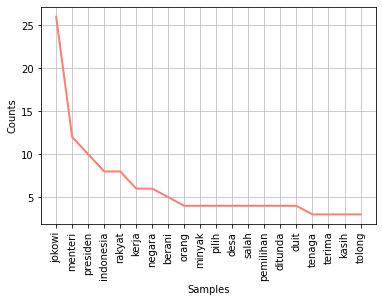

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
uni = nltk.FreqDist(word_dict)
uni.plot(20, color='salmon')

Kamus kata yang sudah bersih tadi dicek frekuensinya dengan unigram. Dari diagram di atas dapat disimpulkan bahwa selain kata 'jokowi' yang tentu saja paling banyak, kata 'menteri' juga banyak bermunculan.

### Bigram

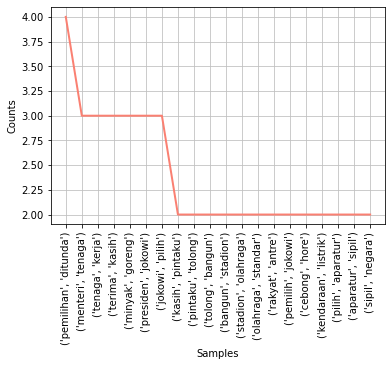

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
bigram = list(nltk.bigrams(word_dict))
bi = nltk.FreqDist(bigram)
bi.plot(20, color='salmon')

Apabila dicek secara bigram,kemunculan kedua kata yang paling sering adalah 'pemilihan ditunda'.

### Trigram

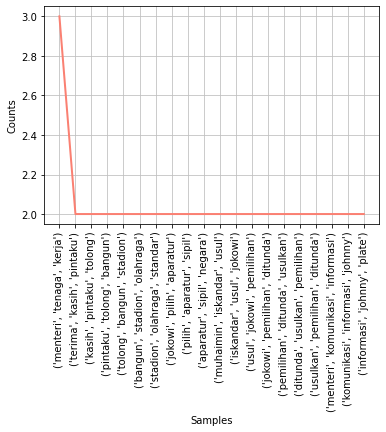

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
trigram = list(nltk.everygrams(word_dict,3,3))
tri = nltk.FreqDist(trigram)
tri.plot(20, color='salmon')

Dalam trigram, hanya ada satu kemunculan berdasarkan 3 kata, yaitu menteri tenaga kerja.

### Positive Frequency

In [15]:
pos_non_zero = []
pos_freq = []
for i in range(len(sentiment_pos)):
    word = sentiment_pos[i]
    if ' ' in sentiment_pos[i]:
        arr = sentiment_pos[i].split()
        if len(arr) == 2:
            word = (arr[0], arr[1])
        elif len(arr) == 3:
            word = (arr[0], arr[1], arr[2])
    freq = uni.freq(word) + bi.freq(word) + tri.freq(word)
    if freq > 0: pos_non_zero.append((word, freq))
    pos_freq.append(freq)
pos_non_zero

[('adil', 0.0016155088852988692),
 ('berani', 0.008077544426494346),
 ('berhasil', 0.0016155088852988692),
 ('berpendidikan', 0.0016155088852988692),
 ('cocok', 0.0016155088852988692),
 ('contoh', 0.0016155088852988692),
 ('dukungan', 0.0016155088852988692),
 ('energi', 0.0032310177705977385),
 ('hati', 0.0032310177705977385),
 ('hore', 0.004846526655896607),
 ('iman', 0.0016155088852988692),
 ('kemampuan', 0.0016155088852988692),
 ('keuntungan', 0.0016155088852988692),
 ('khusus', 0.0016155088852988692),
 ('komitmen', 0.0016155088852988692),
 ('maju', 0.0016155088852988692),
 ('mantap', 0.0016155088852988692),
 ('memperkaya', 0.0016155088852988692),
 ('mendukung', 0.0016155088852988692),
 ('menyambut', 0.0016155088852988692),
 ('nyaman', 0.0016155088852988692),
 ('pahlawan', 0.0032310177705977385),
 ('pembela', 0.0016155088852988692),
 ('puas', 0.0032310177705977385),
 ('pulih', 0.0016155088852988692),
 ('semangat', 0.0016155088852988692),
 ('senang', 0.0016155088852988692),
 ('terhor

Frekuensi kemunculan dari tiap kata bersentimen positif dikumpulkan dan dicek. Tiap kata dicari frekuensinya dari ketiga metode diatas (unigram, bigram, trigram).

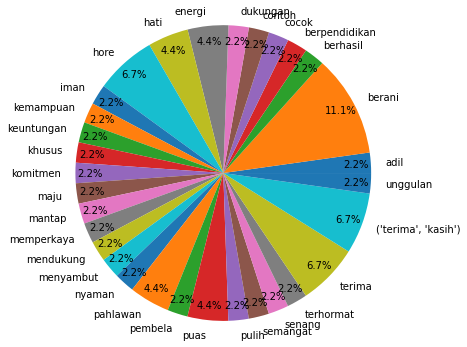

In [16]:
kata_pos_non_zero = [pos for pos, freq in pos_non_zero]
freq_pos_non_zero = [freq for pos, freq in pos_non_zero]
sum_pos_non_zero = sum(pos_freq)
persen_pos_non_zero = [freq/sum_pos_non_zero for freq in freq_pos_non_zero]

plt.pie(persen_pos_non_zero, labels=kata_pos_non_zero, autopct='%0.1f%%', radius=1.7, pctdistance=0.9 )
plt.show()

Alhasil, dapat dilihat frekuensi kata positif di dalam pie chart diatas. Kata positif yang paling banyak muncul dalam pencarian kata 'jokowi' adalah kata 'berani'.

### Negative Frequency

In [17]:
neg_non_zero = []
neg_freq = []
for i in range(len(sentiment_neg)):
    word = sentiment_neg[i]
    if ' ' in sentiment_neg[i]:
        arr = sentiment_neg[i].split()
        if len(arr) == 2:
            word = (arr[0], arr[1])
        elif len(arr) == 3:
            word = (arr[0], arr[1], arr[2])
    freq = uni.freq(word) + bi.freq(word) + tri.freq(word)
    if freq > 0: neg_non_zero.append((word, freq))
    neg_freq.append(freq)
neg_non_zero

[('anehnya', 0.0016155088852988692),
 ('cebong', 0.0032310177705977385),
 ('diam', 0.0016155088852988692),
 ('goreng', 0.004846526655896607),
 ('ironis', 0.0016155088852988692),
 ('jahat', 0.0032310177705977385),
 ('kasihan', 0.0032310177705977385),
 ('kelangkaan', 0.0016155088852988692),
 ('keras', 0.0016155088852988692),
 ('korban', 0.0016155088852988692),
 ('krisis', 0.0016155088852988692),
 ('kritik', 0.0016155088852988692),
 ('lawan', 0.0016155088852988692),
 ('lemah', 0.0016155088852988692),
 ('lunak', 0.0016155088852988692),
 ('membela', 0.0016155088852988692),
 ('menderita', 0.0016155088852988692),
 ('menentang', 0.0016155088852988692),
 ('menghilangkan', 0.0032310177705977385),
 ('pembenci', 0.0016155088852988692),
 ('pemilih', 0.0032310177705977385),
 ('penipu', 0.0016155088852988692),
 ('pesimis', 0.0016155088852988692),
 ('ragu', 0.0016155088852988692),
 ('ramai', 0.0016155088852988692),
 ('rezim', 0.0032310177705977385),
 ('ribut', 0.0016155088852988692),
 ('salah', 0.0064

Hal yang sama diterapkan juga saat mencari kata bersentimen negatif.

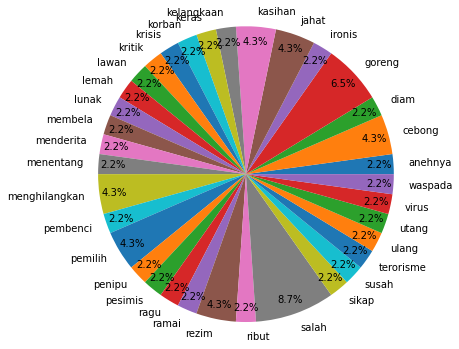

In [24]:
kata_neg_non_zero = [neg for neg, _ in neg_non_zero]
freq_neg_non_zero = [freq for _, freq in neg_non_zero]
sum_neg_non_zero = sum(neg_freq)
persen_neg_non_zero = [freq/sum_neg_non_zero for freq in freq_neg_non_zero]

plt.pie(persen_neg_non_zero, labels=kata_neg_non_zero, autopct='%0.1f%%', radius=1.7, pctdistance=0.9 )
plt.show()

Untuk kata negatif, kata negatif yang paling sering muncul adalah 'salah'.

In [19]:
sum_pos = sum(pos_freq)
sum_neg = sum(neg_freq)
net_freq = 1 - sum_pos - sum_neg
sum_pos, sum_neg, net_freq

(0.07270574211459135, 0.07431340872374798, 0.8529808491616606)

Lalu, dihitung juga frekuensi kata yang bersifat netral.

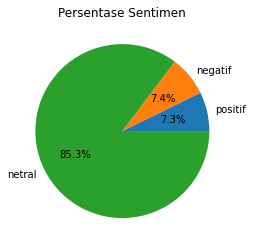

In [20]:
plt.pie([sum_pos, sum_neg, net_freq], labels=('positif', 'negatif', 'netral'), autopct='%0.1f%%')
plt.title('Persentase Sentimen')
plt.show()

Dengan nilai sentimen yang dihitung sebelumnya, maka dapat dilihat bahwa untuk sentimen negatif lebih banyak 0.1% dibandingkan dengan sentimen positif. Mayoritas sentimen dalam tweet bersifat netral (sebanyak 85.3%).

In [21]:
pos_persen = sum_pos/(sum_pos+sum_neg)
neg_persen = sum_neg/(sum_pos+sum_neg)
pos_persen, neg_persen

(0.4945324585266977, 0.5054675414733023)

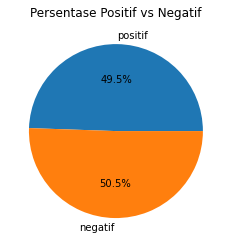

In [22]:
plt.pie([pos_persen, neg_persen], labels=('positif', 'negatif'), autopct='%0.1f%%')
plt.title('Persentase Positif vs Negatif')
plt.show()

Jika hanya ingin melihat positif dan negatifnya saja, maka sentimen negatif memang unggul tipis. Sehingga, dapat disimpulkan bahwa kebanyakan sentimen mengenai 'jokowi' di Twitter mungkin lebih condong ke arah negatif.